In [1]:
import tensorflow as tf
import os
import numpy as np
import random
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from TssmNet import TssmNet, generate_input
import matplotlib.pyplot as plt
import pandas as pd
import shutil
from tqdm import tqdm

In [2]:
import tensorflow as tf 
from tensorflow.python.client import device_lib
tf.debugging.set_log_device_placement(True)
gpus =tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")

Running on CPU


In [2]:
BATCH_SIZE = 8192
DATA_PATH = os.path.join("..", "..", "Train2")
VALIDATION_PATH = os.path.join("..", "..", "Validation2")
TEST_PATH = os.path.join("..", "..", "Test2")
MODEL_PATH = os.path.join("Model", "TSSM")

In [3]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=0.99, extension="_.ssm.npy")
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=0.90, extension="_.ssm.npy")
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=0.99, extension="_.ssm.npy")

In [4]:
model =  TssmNet().build()

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 6)]           0         
                                                                 
 encoder (Encoder)           (None, 16, 12)            3790      
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 193       
                                                                 
Total params: 3983 (15.56 KB)
Trainable params: 3983 (15.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


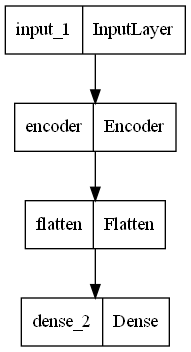

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [10]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

In [12]:
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=40,
         callbacks= [tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=5, min_lr=0.0000001)])

Epoch 1/40
464/464 [==============================] - 455s 972ms/step - loss: 0.4102 - accuracy: 0.8467 - precision: 0.1263 - recall: 0.0675 - val_loss: 0.1619 - val_accuracy: 0.9507 - val_precision: 0.1667 - val_recall: 2.1559e-04 - lr: 0.0010
Epoch 2/40
464/464 [==============================] - 383s 826ms/step - loss: 0.3161 - accuracy: 0.8791 - precision: 0.3833 - recall: 0.1313 - val_loss: 0.2684 - val_accuracy: 0.9049 - val_precision: 0.2220 - val_recall: 0.0068 - lr: 0.0010
Epoch 3/40
464/464 [==============================] - 349s 752ms/step - loss: 0.2756 - accuracy: 0.8988 - precision: 0.6782 - recall: 0.2817 - val_loss: 0.3490 - val_accuracy: 0.8547 - val_precision: 0.3616 - val_recall: 0.7608 - lr: 0.0010
Epoch 4/40
464/464 [==============================] - 367s 790ms/step - loss: 0.2868 - accuracy: 0.8945 - precision: 0.5757 - recall: 0.3585 - val_loss: 0.1869 - val_accuracy: 0.9191 - val_precision: 0.9639 - val_recall: 0.2063 - lr: 0.0010
Epoch 5/40
464/464 [============

Epoch 35/40
464/464 [==============================] - 318s 686ms/step - loss: 0.1421 - accuracy: 0.9475 - precision: 0.8534 - recall: 0.6301 - val_loss: 0.0698 - val_accuracy: 0.9786 - val_precision: 0.8832 - val_recall: 0.7972 - lr: 1.0000e-07
Epoch 36/40
464/464 [==============================] - 315s 680ms/step - loss: 0.1522 - accuracy: 0.9442 - precision: 0.8499 - recall: 0.6241 - val_loss: 0.0774 - val_accuracy: 0.9734 - val_precision: 0.8745 - val_recall: 0.7592 - lr: 1.0000e-07
Epoch 37/40
464/464 [==============================] - 319s 687ms/step - loss: 0.1423 - accuracy: 0.9481 - precision: 0.8529 - recall: 0.6314 - val_loss: 0.0839 - val_accuracy: 0.9707 - val_precision: 0.8905 - val_recall: 0.7645 - lr: 1.0000e-07
Epoch 38/40
464/464 [==============================] - 314s 676ms/step - loss: 0.1523 - accuracy: 0.9434 - precision: 0.8461 - recall: 0.6097 - val_loss: 0.0661 - val_accuracy: 0.9787 - val_precision: 0.9037 - val_recall: 0.8100 - lr: 1.0000e-07
Epoch 39/40
464/

In [7]:
history_df = pd.DataFrame(hist.history)

# Plot the training loss and accuracy
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy']].plot()
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

NameError: name 'hist' is not defined

# Evaluate

In [13]:
e1 = Evaluation(model, datagen_test)
e1.predict()
e1.eval_()

  0%|          | 0/174 [00:00<?, ?it/s]

256/256 [==============================] - 1s 3ms/step


  1%|          | 1/174 [00:01<04:44,  1.64s/it]

256/256 [==============================] - 1s 3ms/step


  1%|          | 2/174 [00:02<03:24,  1.19s/it]

256/256 [==============================] - 1s 3ms/step


  2%|▏         | 3/174 [00:03<02:52,  1.01s/it]

256/256 [==============================] - 1s 3ms/step


  2%|▏         | 4/174 [00:04<02:35,  1.09it/s]

256/256 [==============================] - 1s 2ms/step


  3%|▎         | 5/174 [00:04<02:23,  1.18it/s]

256/256 [==============================] - 1s 3ms/step


  3%|▎         | 6/174 [00:05<02:18,  1.21it/s]

256/256 [==============================] - 1s 3ms/step


  4%|▍         | 7/174 [00:06<02:20,  1.19it/s]

256/256 [==============================] - 1s 3ms/step


  5%|▍         | 8/174 [00:07<02:16,  1.22it/s]

256/256 [==============================] - 1s 2ms/step


  5%|▌         | 9/174 [00:08<02:12,  1.24it/s]

256/256 [==============================] - 1s 3ms/step


  6%|▌         | 10/174 [00:08<02:12,  1.24it/s]

256/256 [==============================] - 1s 3ms/step


  6%|▋         | 11/174 [00:09<02:13,  1.22it/s]

256/256 [==============================] - 1s 3ms/step


  7%|▋         | 12/174 [00:10<02:15,  1.19it/s]

256/256 [==============================] - 1s 3ms/step


  7%|▋         | 13/174 [00:11<02:18,  1.16it/s]

256/256 [==============================] - 1s 2ms/step


  8%|▊         | 14/174 [00:12<02:12,  1.21it/s]

256/256 [==============================] - 1s 3ms/step


  9%|▊         | 15/174 [00:12<02:08,  1.24it/s]

256/256 [==============================] - 1s 2ms/step


  9%|▉         | 16/174 [00:13<02:04,  1.26it/s]

256/256 [==============================] - 1s 2ms/step


 10%|▉         | 17/174 [00:14<02:01,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 10%|█         | 18/174 [00:15<01:59,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 11%|█         | 19/174 [00:16<02:01,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 11%|█▏        | 20/174 [00:16<02:00,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 12%|█▏        | 21/174 [00:17<02:03,  1.24it/s]

256/256 [==============================] - 1s 3ms/step


 13%|█▎        | 22/174 [00:18<02:03,  1.23it/s]

256/256 [==============================] - 1s 3ms/step


 13%|█▎        | 23/174 [00:19<02:03,  1.23it/s]

256/256 [==============================] - 1s 3ms/step


 14%|█▍        | 24/174 [00:20<02:04,  1.20it/s]

256/256 [==============================] - 1s 3ms/step


 14%|█▍        | 25/174 [00:21<02:04,  1.20it/s]

256/256 [==============================] - 1s 3ms/step


 15%|█▍        | 26/174 [00:21<02:06,  1.17it/s]

256/256 [==============================] - 1s 3ms/step


 16%|█▌        | 27/174 [00:22<02:04,  1.18it/s]

256/256 [==============================] - 1s 2ms/step


 16%|█▌        | 28/174 [00:23<02:00,  1.21it/s]

256/256 [==============================] - 1s 2ms/step


 17%|█▋        | 29/174 [00:24<01:57,  1.24it/s]

256/256 [==============================] - 1s 3ms/step


 17%|█▋        | 30/174 [00:25<01:57,  1.23it/s]

256/256 [==============================] - 1s 3ms/step


 18%|█▊        | 31/174 [00:25<01:57,  1.21it/s]

256/256 [==============================] - 1s 2ms/step


 18%|█▊        | 32/174 [00:26<01:55,  1.23it/s]

256/256 [==============================] - 1s 2ms/step


 19%|█▉        | 33/174 [00:27<01:52,  1.26it/s]

256/256 [==============================] - 1s 2ms/step


 20%|█▉        | 34/174 [00:28<01:49,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 20%|██        | 35/174 [00:29<01:47,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 21%|██        | 36/174 [00:29<01:45,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 21%|██▏       | 37/174 [00:30<01:43,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 22%|██▏       | 38/174 [00:31<01:42,  1.33it/s]

256/256 [==============================] - 1s 3ms/step


 22%|██▏       | 39/174 [00:32<01:41,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██▎       | 40/174 [00:32<01:40,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 24%|██▎       | 41/174 [00:33<01:40,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 24%|██▍       | 42/174 [00:34<01:40,  1.32it/s]

256/256 [==============================] - 1s 3ms/step


 25%|██▍       | 43/174 [00:35<01:41,  1.29it/s]

256/256 [==============================] - 1s 3ms/step


 25%|██▌       | 44/174 [00:35<01:41,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 26%|██▌       | 45/174 [00:36<01:41,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 26%|██▋       | 46/174 [00:37<01:38,  1.30it/s]

256/256 [==============================] - 1s 3ms/step


 27%|██▋       | 47/174 [00:38<01:38,  1.30it/s]

256/256 [==============================] - 1s 3ms/step


 28%|██▊       | 48/174 [00:39<01:42,  1.23it/s]

256/256 [==============================] - 1s 2ms/step


 28%|██▊       | 49/174 [00:39<01:39,  1.26it/s]

256/256 [==============================] - 1s 3ms/step


 29%|██▊       | 50/174 [00:40<01:38,  1.26it/s]

256/256 [==============================] - 1s 2ms/step


 29%|██▉       | 51/174 [00:41<01:35,  1.29it/s]

256/256 [==============================] - 1s 3ms/step


 30%|██▉       | 52/174 [00:42<01:35,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 30%|███       | 53/174 [00:42<01:35,  1.26it/s]

256/256 [==============================] - 1s 2ms/step


 31%|███       | 54/174 [00:43<01:31,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 32%|███▏      | 55/174 [00:44<01:28,  1.35it/s]

256/256 [==============================] - 1s 2ms/step


 32%|███▏      | 56/174 [00:45<01:26,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 33%|███▎      | 57/174 [00:45<01:25,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 33%|███▎      | 58/174 [00:46<01:24,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███▍      | 59/174 [00:47<01:24,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


 34%|███▍      | 60/174 [00:48<01:24,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 35%|███▌      | 61/174 [00:48<01:21,  1.39it/s]

256/256 [==============================] - 1s 2ms/step


 36%|███▌      | 62/174 [00:49<01:22,  1.36it/s]

256/256 [==============================] - 1s 3ms/step


 36%|███▌      | 63/174 [00:50<01:23,  1.32it/s]

256/256 [==============================] - 1s 3ms/step


 37%|███▋      | 64/174 [00:51<01:25,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 37%|███▋      | 65/174 [00:51<01:25,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 38%|███▊      | 66/174 [00:52<01:23,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███▊      | 67/174 [00:53<01:21,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 39%|███▉      | 68/174 [00:54<01:21,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 40%|███▉      | 69/174 [00:54<01:18,  1.35it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████      | 70/174 [00:55<01:15,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


 41%|████      | 71/174 [00:56<01:13,  1.40it/s]

256/256 [==============================] - 1s 2ms/step


 41%|████▏     | 72/174 [00:56<01:12,  1.40it/s]

256/256 [==============================] - 1s 2ms/step


 42%|████▏     | 73/174 [00:57<01:11,  1.41it/s]

256/256 [==============================] - 1s 2ms/step


 43%|████▎     | 74/174 [00:58<01:10,  1.42it/s]

256/256 [==============================] - 1s 2ms/step


 43%|████▎     | 75/174 [00:59<01:09,  1.43it/s]

256/256 [==============================] - 1s 2ms/step


 44%|████▎     | 76/174 [00:59<01:07,  1.46it/s]

256/256 [==============================] - 1s 2ms/step


 44%|████▍     | 77/174 [01:00<01:06,  1.47it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████▍     | 78/174 [01:01<01:05,  1.46it/s]

256/256 [==============================] - 1s 2ms/step


 45%|████▌     | 79/174 [01:01<01:05,  1.45it/s]

256/256 [==============================] - 1s 2ms/step


 46%|████▌     | 80/174 [01:02<01:05,  1.43it/s]

256/256 [==============================] - 1s 2ms/step


 47%|████▋     | 81/174 [01:03<01:05,  1.42it/s]

256/256 [==============================] - 1s 2ms/step


 47%|████▋     | 82/174 [01:03<01:04,  1.43it/s]

256/256 [==============================] - 1s 2ms/step


 48%|████▊     | 83/174 [01:04<01:03,  1.43it/s]

256/256 [==============================] - 1s 2ms/step


 48%|████▊     | 84/174 [01:05<01:05,  1.38it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████▉     | 85/174 [01:06<01:05,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


 49%|████▉     | 86/174 [01:06<01:04,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 50%|█████     | 87/174 [01:07<01:04,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████     | 88/174 [01:08<01:03,  1.36it/s]

256/256 [==============================] - 1s 3ms/step


 51%|█████     | 89/174 [01:09<01:04,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 52%|█████▏    | 90/174 [01:09<01:05,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████▏    | 91/174 [01:10<01:03,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 53%|█████▎    | 92/174 [01:11<01:01,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 53%|█████▎    | 93/174 [01:12<01:00,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 54%|█████▍    | 94/174 [01:12<00:58,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 55%|█████▍    | 95/174 [01:13<00:58,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 55%|█████▌    | 96/174 [01:14<00:56,  1.39it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████▌    | 97/174 [01:15<00:55,  1.39it/s]

256/256 [==============================] - 1s 2ms/step


 56%|█████▋    | 98/174 [01:15<00:54,  1.39it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████▋    | 99/174 [01:16<00:53,  1.39it/s]

256/256 [==============================] - 1s 2ms/step


 57%|█████▋    | 100/174 [01:17<00:53,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


 58%|█████▊    | 101/174 [01:17<00:52,  1.38it/s]

256/256 [==============================] - 1s 2ms/step


 59%|█████▊    | 102/174 [01:18<00:52,  1.36it/s]

256/256 [==============================] - 1s 2ms/step


 59%|█████▉    | 103/174 [01:19<00:52,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 60%|█████▉    | 104/174 [01:20<00:52,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 60%|██████    | 105/174 [01:20<00:51,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 61%|██████    | 106/174 [01:21<00:50,  1.34it/s]

256/256 [==============================] - 1s 3ms/step


 61%|██████▏   | 107/174 [01:22<00:50,  1.33it/s]

256/256 [==============================] - 1s 3ms/step


 62%|██████▏   | 108/174 [01:23<00:50,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████▎   | 109/174 [01:24<00:49,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████▎   | 110/174 [01:24<00:49,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 64%|██████▍   | 111/174 [01:25<00:48,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 64%|██████▍   | 112/174 [01:26<00:48,  1.27it/s]

256/256 [==============================] - 1s 2ms/step


 65%|██████▍   | 113/174 [01:27<00:47,  1.29it/s]

256/256 [==============================] - 1s 3ms/step


 66%|██████▌   | 114/174 [01:27<00:46,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 66%|██████▌   | 115/174 [01:28<00:44,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 67%|██████▋   | 116/174 [01:29<00:43,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 67%|██████▋   | 117/174 [01:30<00:43,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████▊   | 118/174 [01:30<00:42,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████▊   | 119/174 [01:31<00:41,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 69%|██████▉   | 120/174 [01:32<00:41,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 70%|██████▉   | 121/174 [01:33<00:40,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████   | 122/174 [01:33<00:39,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 71%|███████   | 123/174 [01:34<00:38,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 71%|███████▏  | 124/174 [01:35<00:37,  1.34it/s]

256/256 [==============================] - 1s 3ms/step


 72%|███████▏  | 125/174 [01:36<00:36,  1.33it/s]

256/256 [==============================] - 1s 3ms/step


 72%|███████▏  | 126/174 [01:36<00:36,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 73%|███████▎  | 127/174 [01:37<00:36,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 74%|███████▎  | 128/174 [01:38<00:36,  1.25it/s]

256/256 [==============================] - 1s 3ms/step


 74%|███████▍  | 129/174 [01:39<00:35,  1.26it/s]

256/256 [==============================] - 1s 3ms/step


 75%|███████▍  | 130/174 [01:40<00:35,  1.25it/s]

256/256 [==============================] - 1s 2ms/step


 75%|███████▌  | 131/174 [01:41<00:33,  1.27it/s]

256/256 [==============================] - 1s 3ms/step


 76%|███████▌  | 132/174 [01:41<00:33,  1.24it/s]

256/256 [==============================] - 1s 2ms/step


 76%|███████▋  | 133/174 [01:42<00:32,  1.27it/s]

256/256 [==============================] - 1s 2ms/step


 77%|███████▋  | 134/174 [01:43<00:30,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 78%|███████▊  | 135/174 [01:44<00:30,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 78%|███████▊  | 136/174 [01:44<00:29,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████▊  | 137/174 [01:45<00:28,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 79%|███████▉  | 138/174 [01:46<00:27,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 80%|███████▉  | 139/174 [01:47<00:26,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 80%|████████  | 140/174 [01:47<00:25,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████  | 141/174 [01:48<00:24,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 82%|████████▏ | 142/174 [01:49<00:24,  1.32it/s]

256/256 [==============================] - 1s 2ms/step


 82%|████████▏ | 143/174 [01:50<00:23,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 83%|████████▎ | 144/174 [01:50<00:22,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 83%|████████▎ | 145/174 [01:51<00:21,  1.35it/s]

256/256 [==============================] - 1s 2ms/step


 84%|████████▍ | 146/174 [01:52<00:20,  1.36it/s]

256/256 [==============================] - 1s 3ms/step


 84%|████████▍ | 147/174 [01:53<00:21,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 85%|████████▌ | 148/174 [01:54<00:20,  1.26it/s]

256/256 [==============================] - 1s 3ms/step


 86%|████████▌ | 149/174 [01:54<00:20,  1.22it/s]

256/256 [==============================] - 1s 3ms/step


 86%|████████▌ | 150/174 [01:55<00:19,  1.23it/s]

256/256 [==============================] - 1s 3ms/step


 87%|████████▋ | 151/174 [01:56<00:18,  1.23it/s]

256/256 [==============================] - 1s 2ms/step


 87%|████████▋ | 152/174 [01:57<00:17,  1.27it/s]

256/256 [==============================] - 1s 3ms/step


 88%|████████▊ | 153/174 [01:58<00:16,  1.27it/s]

256/256 [==============================] - 1s 2ms/step


 89%|████████▊ | 154/174 [01:58<00:15,  1.31it/s]

256/256 [==============================] - 1s 2ms/step


 89%|████████▉ | 155/174 [01:59<00:14,  1.35it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████▉ | 156/174 [02:00<00:13,  1.38it/s]

256/256 [==============================] - 1s 2ms/step


 90%|█████████ | 157/174 [02:00<00:12,  1.37it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████ | 158/174 [02:01<00:11,  1.37it/s]

256/256 [==============================] - 1s 3ms/step


 91%|█████████▏| 159/174 [02:02<00:11,  1.35it/s]

256/256 [==============================] - 1s 3ms/step


 92%|█████████▏| 160/174 [02:03<00:10,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 93%|█████████▎| 161/174 [02:03<00:10,  1.30it/s]

256/256 [==============================] - 1s 2ms/step


 93%|█████████▎| 162/174 [02:04<00:09,  1.28it/s]

256/256 [==============================] - 1s 3ms/step


 94%|█████████▎| 163/174 [02:05<00:08,  1.29it/s]

256/256 [==============================] - 1s 2ms/step


 94%|█████████▍| 164/174 [02:06<00:07,  1.33it/s]

256/256 [==============================] - 1s 2ms/step


 95%|█████████▍| 165/174 [02:06<00:06,  1.34it/s]

256/256 [==============================] - 1s 2ms/step


 95%|█████████▌| 166/174 [02:07<00:05,  1.35it/s]

256/256 [==============================] - 1s 2ms/step


 96%|█████████▌| 167/174 [02:08<00:05,  1.36it/s]

256/256 [==============================] - 1s 3ms/step


 97%|█████████▋| 168/174 [02:09<00:04,  1.33it/s]

256/256 [==============================] - 1s 3ms/step


 97%|█████████▋| 169/174 [02:09<00:03,  1.31it/s]

256/256 [==============================] - 1s 3ms/step


 98%|█████████▊| 170/174 [02:10<00:03,  1.29it/s]

256/256 [==============================] - 1s 3ms/step


 98%|█████████▊| 171/174 [02:11<00:02,  1.29it/s]

256/256 [==============================] - 1s 3ms/step


 99%|█████████▉| 172/174 [02:12<00:01,  1.28it/s]

256/256 [==============================] - 1s 2ms/step


 99%|█████████▉| 173/174 [02:13<00:00,  1.32it/s]

256/256 [==============================] - 1s 3ms/step


100%|██████████| 174/174 [02:13<00:00,  1.30it/s]


,precision,recall,MCC,F1,accuracy,IoU
0,0.847647,0.701958,0.747497,0.767953,0.955275,0.623315


In [14]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: Model\TSSM\assets


INFO:tensorflow:Assets written to: Model\TSSM\assets
